# 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


1. Home Creditはどのような企業？
2. このコンペティションでは何を予測する？
3. それを予測することで企業が得られるメリットは何？


#### 1. Home Creditはどのような企業
クレジットカードの融資事業をされている会社。<br>
また、信用評価を行う事業を実施している

#### 2. このコンペティションでは何を予測する？
融資等で信用情報を検討する際に、クライアントの返済能力を予測します。

#### 3. それを予測することで企業が得られるメリットは何?
3日以上かかっていた処理が、数秒程度で信用評価を獲得する事ができる。<br>
コスト圧縮が可能。<br>
また予測精度の向上により貸し倒れ企業の減少が予想される<br>

# 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


.head()、.info()、describe()などを使う
欠損値の有無を見る
クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行ってください。



In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/yuki.tatsuoka/Downloads/application_train.csv")

df

'''
考察
データ数は約３０万件、カラムはobject型含めて122存在している
'''

'\n考察\nデータ数は約３０万件、カラムはobject型含めて122存在している\n'

In [201]:
pd.set_option("max_rows", 200)
pd.set_option("max_columns", 200)
df.info()

'''
考察
float64(65), int64(41), object(16)で、数値型が８割を占めていて16項目全てを最終的に数値化する必要がある
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


'\n考察\nfloat64(65), int64(41), object(16)で、数値型が８割を占めていて16項目全てを最終的に数値化する必要がある\n'

In [24]:
df.describe()

'''
考察
現段階では、異常値を把握する事は不可。
データを散らばり具合を漫然と確認できる程度なので図式化する必要がある。
'''

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [43]:
isnull_list = df.isnull().sum()
isnull_list = isnull_list[isnull_list > 0]
print("欠損値の数は{}".format(len(isnull_list)))
print("数は\n{}".format(isnull_list))

'''
考察
欠損値は67のデータに含まれる
欠損値は様々で、少数〜半数失われている。
'''

欠損値の数は67
数は
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEX

'\n考察\n欠損値は67のデータに含まれる\n欠損値は様々で、少数〜半数失われている。\n'

In [42]:
# %を表示する
print("割合は%です\n{}".format(isnull_list / len(df) * 100))

割合は%です
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE            

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64


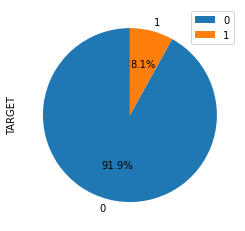

In [139]:
# クラスの割合を把握する

# TARGETのデータ数の数を把握する
df_target = df["TARGET"]
df_target_counts = df_target.value_counts()
print(df_target)

# 図式化する
df_target_counts.plot(kind="pie", startangle=90, autopct="%1.1f%%")
plt.legend()
plt.show()

# 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

## 問題3 仮説
TARGETと他のデータの相関を見た後にscatter等でみてみる


## 結論
TARGETに相関があるかと思ったが、実際はほとんどない。<br>
最も高くても0.07と1つ1つによる相関は全く高くない。<br>

分析したデータは問題4の図１から読み取れる。<br>

#### 変数の説明
'TARGET',：目的変数　<br>

'DAYS_BIRTH', :年齢　<br>

'REGION_RATING_CLIENT_W_CITY':<br>
都市を考慮したクライアントの居住地域の評価都市を考慮したクライアントの居住地域の評価<br>

'REGION_RATING_CLIENT:<br>
クライアントが住んでいる地域の私たちの評価（1,2,3）<br>

'DAYS_LAST_PHONE_CHANGE',<br> 
アプリケーションが電話を変更する前に何日

'DAYS_ID_PUBLISH':<br>
申請の何日前に、クライアントは申請した身分証明書を変更しました...<br>

'REG_CITY_NOT_WORK_CITY': <br>
クライアントの本籍地が勤務先住所と一致しない場合にフラグを立てます（1 =異なる、0 =同じ、都市レベル）

'FLAG_EMP_PHONE': <br>
クライアントは職場の電話を提供しましたか（1 =はい、0 =いいえ） <br>

'REG_CITY_NOT_LIVE_CITY':<br>
クライアントの本籍地が連絡先住所と一致しない場合にフラグを立てます（1 =異なる、0 =同じ、市のレベルで.. ..<br>

'FLAG_DOCUMENT_3':<br>
クライアントはドキュメント3を提供しましたか <br>

'DAYS_REGISTRATION':<br>
アプリケーションがクライアントの登録を変更する前に何日<br>

'OWN_CAR_AGE':<br>
クライアントの車の年齢<br>

'LIVE_CITY_NOT_WORK_CITY': <br>
クライアントの連絡先住所が職場の住所と一致しない場合にフラグを立てます（1 =異なる、0 =同じ、都市レベル） <br>

'DEF_30_CNT_SOCIAL_CIRCLE': <br>
30 DPDでデフォルトされたクライアントの社会的環境の観察数（期限が過ぎた日数<br>

'DEF_60_CNT_SOCIAL_CIRCLE: <br>
クライアントの社会的環境の観察が60（期限を過ぎた日）DPDでデフォルトになった回数<br>

## 仮説2 他の相関が高いモノを調べてみる
DAYS_BIRTHとFLAG_EMP_PHONE 相関0.62<br>
→誕生年度とクライアントが職場に電話を提供したか比例しているが、貸倒と関係性は低そう <br>

REGION_RATING_CLIENTとREGION_RATING_CLIENT_W_CITY 相関0.95<br>
→クライアントが評価した都市評価と、その町に住んでいる人たちが評価した都市評価では、こちらも貸倒に影響なさそうに見える<br>
REG_CITY_NOT_WORK_CITYとLIVE_CITY_NOT_WORK_CITY　相関0.83<br>
→クライアントの本拠地が勤務先と違う（支店？）は本拠地との連絡先が異なるについても、貸倒に影響がなさそうに見える<br>

## 結論2
相関係数では、貸倒に直結しそうなデータが見つからなかった。<br>
また、他のデータとの関係性を見ても対して役立つ情報が一見なさそうに見えるため、データが多い場合？、相関係数を求める事は意味があるのか疑問に思うレベル。


# 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [96]:
# 仮説を定義するために相関係数を確認する
plt.figure(figsize=(20,20))
corr_df1 = df.corr().sort_values(by="TARGET", ascending=False)
corr_df1["TARGET"]

TARGET                          1.000000
DAYS_BIRTH                      0.078239
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
DAYS_LAST_PHONE_CHANGE          0.055218
DAYS_ID_PUBLISH                 0.051457
REG_CITY_NOT_WORK_CITY          0.050994
FLAG_EMP_PHONE                  0.045982
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
DAYS_REGISTRATION               0.041975
OWN_CAR_AGE                     0.037612
LIVE_CITY_NOT_WORK_CITY         0.032518
DEF_30_CNT_SOCIAL_CIRCLE        0.032248
DEF_60_CNT_SOCIAL_CIRCLE        0.031276
FLAG_WORK_PHONE                 0.028524
AMT_REQ_CREDIT_BUREAU_YEAR      0.019930
CNT_CHILDREN                    0.019187
CNT_FAM_MEMBERS                 0.009308
OBS_30_CNT_SOCIAL_CIRCLE        0.009131
OBS_60_CNT_SOCIAL_CIRCLE        0.009022
REG_REGION_NOT_WORK_REGION      0.006942
REG_REGION_NOT_LIVE_REGION      0.005576
FLAG_DOCUMENT_2                 0.005417
FLAG_DOCUMENT_21

<Figure size 1440x1440 with 0 Axes>

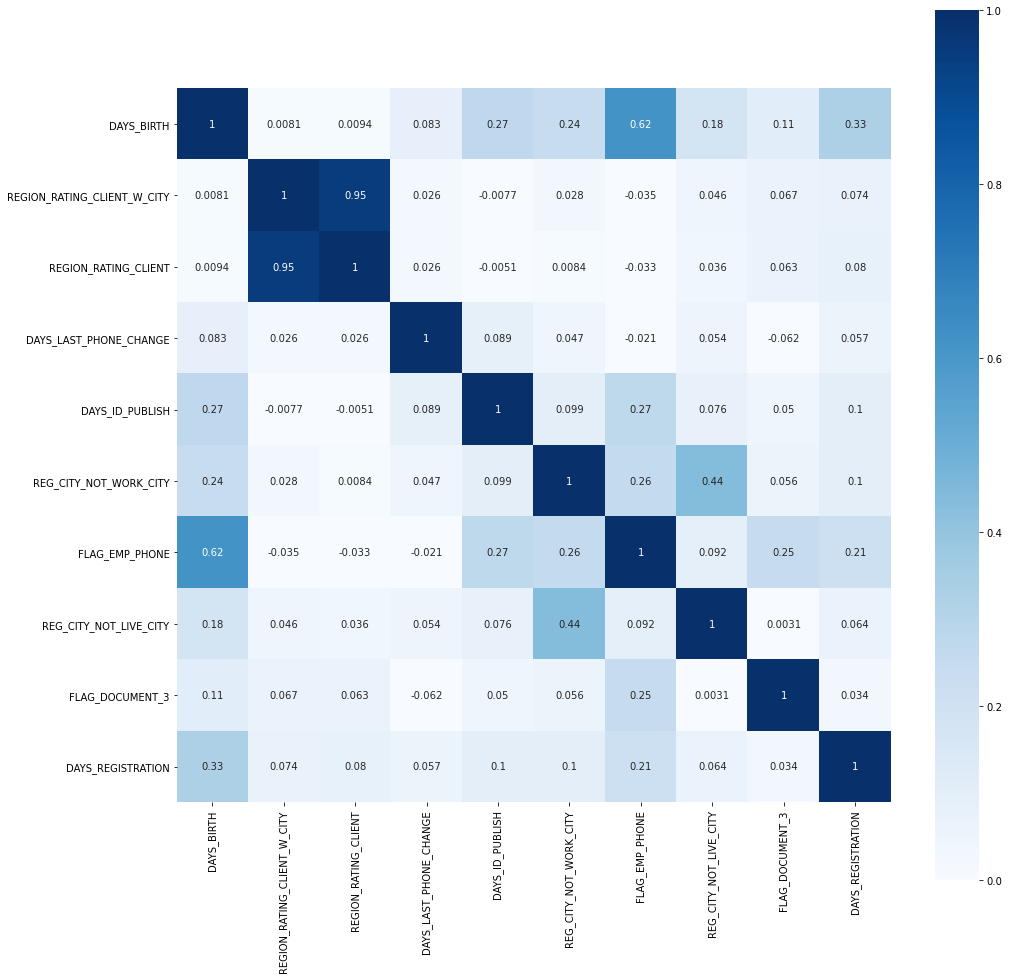

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION
0,-9461,2,2,-1134.0,-2120,0,1,0,1,-3648.0
1,-16765,1,1,-828.0,-291,0,1,0,1,-1186.0
2,-19046,2,2,-815.0,-2531,0,1,0,0,-4260.0
3,-19005,2,2,-617.0,-2437,0,1,0,1,-9833.0
4,-19932,2,2,-1106.0,-3458,1,1,0,0,-4311.0
...,...,...,...,...,...,...,...,...,...,...
307506,-9327,1,1,-273.0,-1982,0,1,0,0,-8456.0
307507,-20775,2,2,0.0,-4090,0,0,0,1,-4388.0
307508,-14966,3,3,-1909.0,-5150,1,1,0,1,-6737.0
307509,-11961,2,2,-322.0,-931,1,1,1,1,-2562.0


In [197]:
# 問題4 図1
from matplotlib import cm

# ソートされた上位20位のtarget変数
sorted_target = corr_df1["TARGET"][1:11].index
df_sorted_target = df[sorted_target]

# 上位20位のTARGETに相関のある物を出力
corr_target = df_sorted_target.corr()

# 図式化 
plt.figure(figsize=(16,16))
sns.heatmap(corr_target, 
            square=True, 
            vmin=0.0, 
            vmax=1.0, 
            annot=True, 
            cmap="Blues")
plt.show()

df_sorted_target

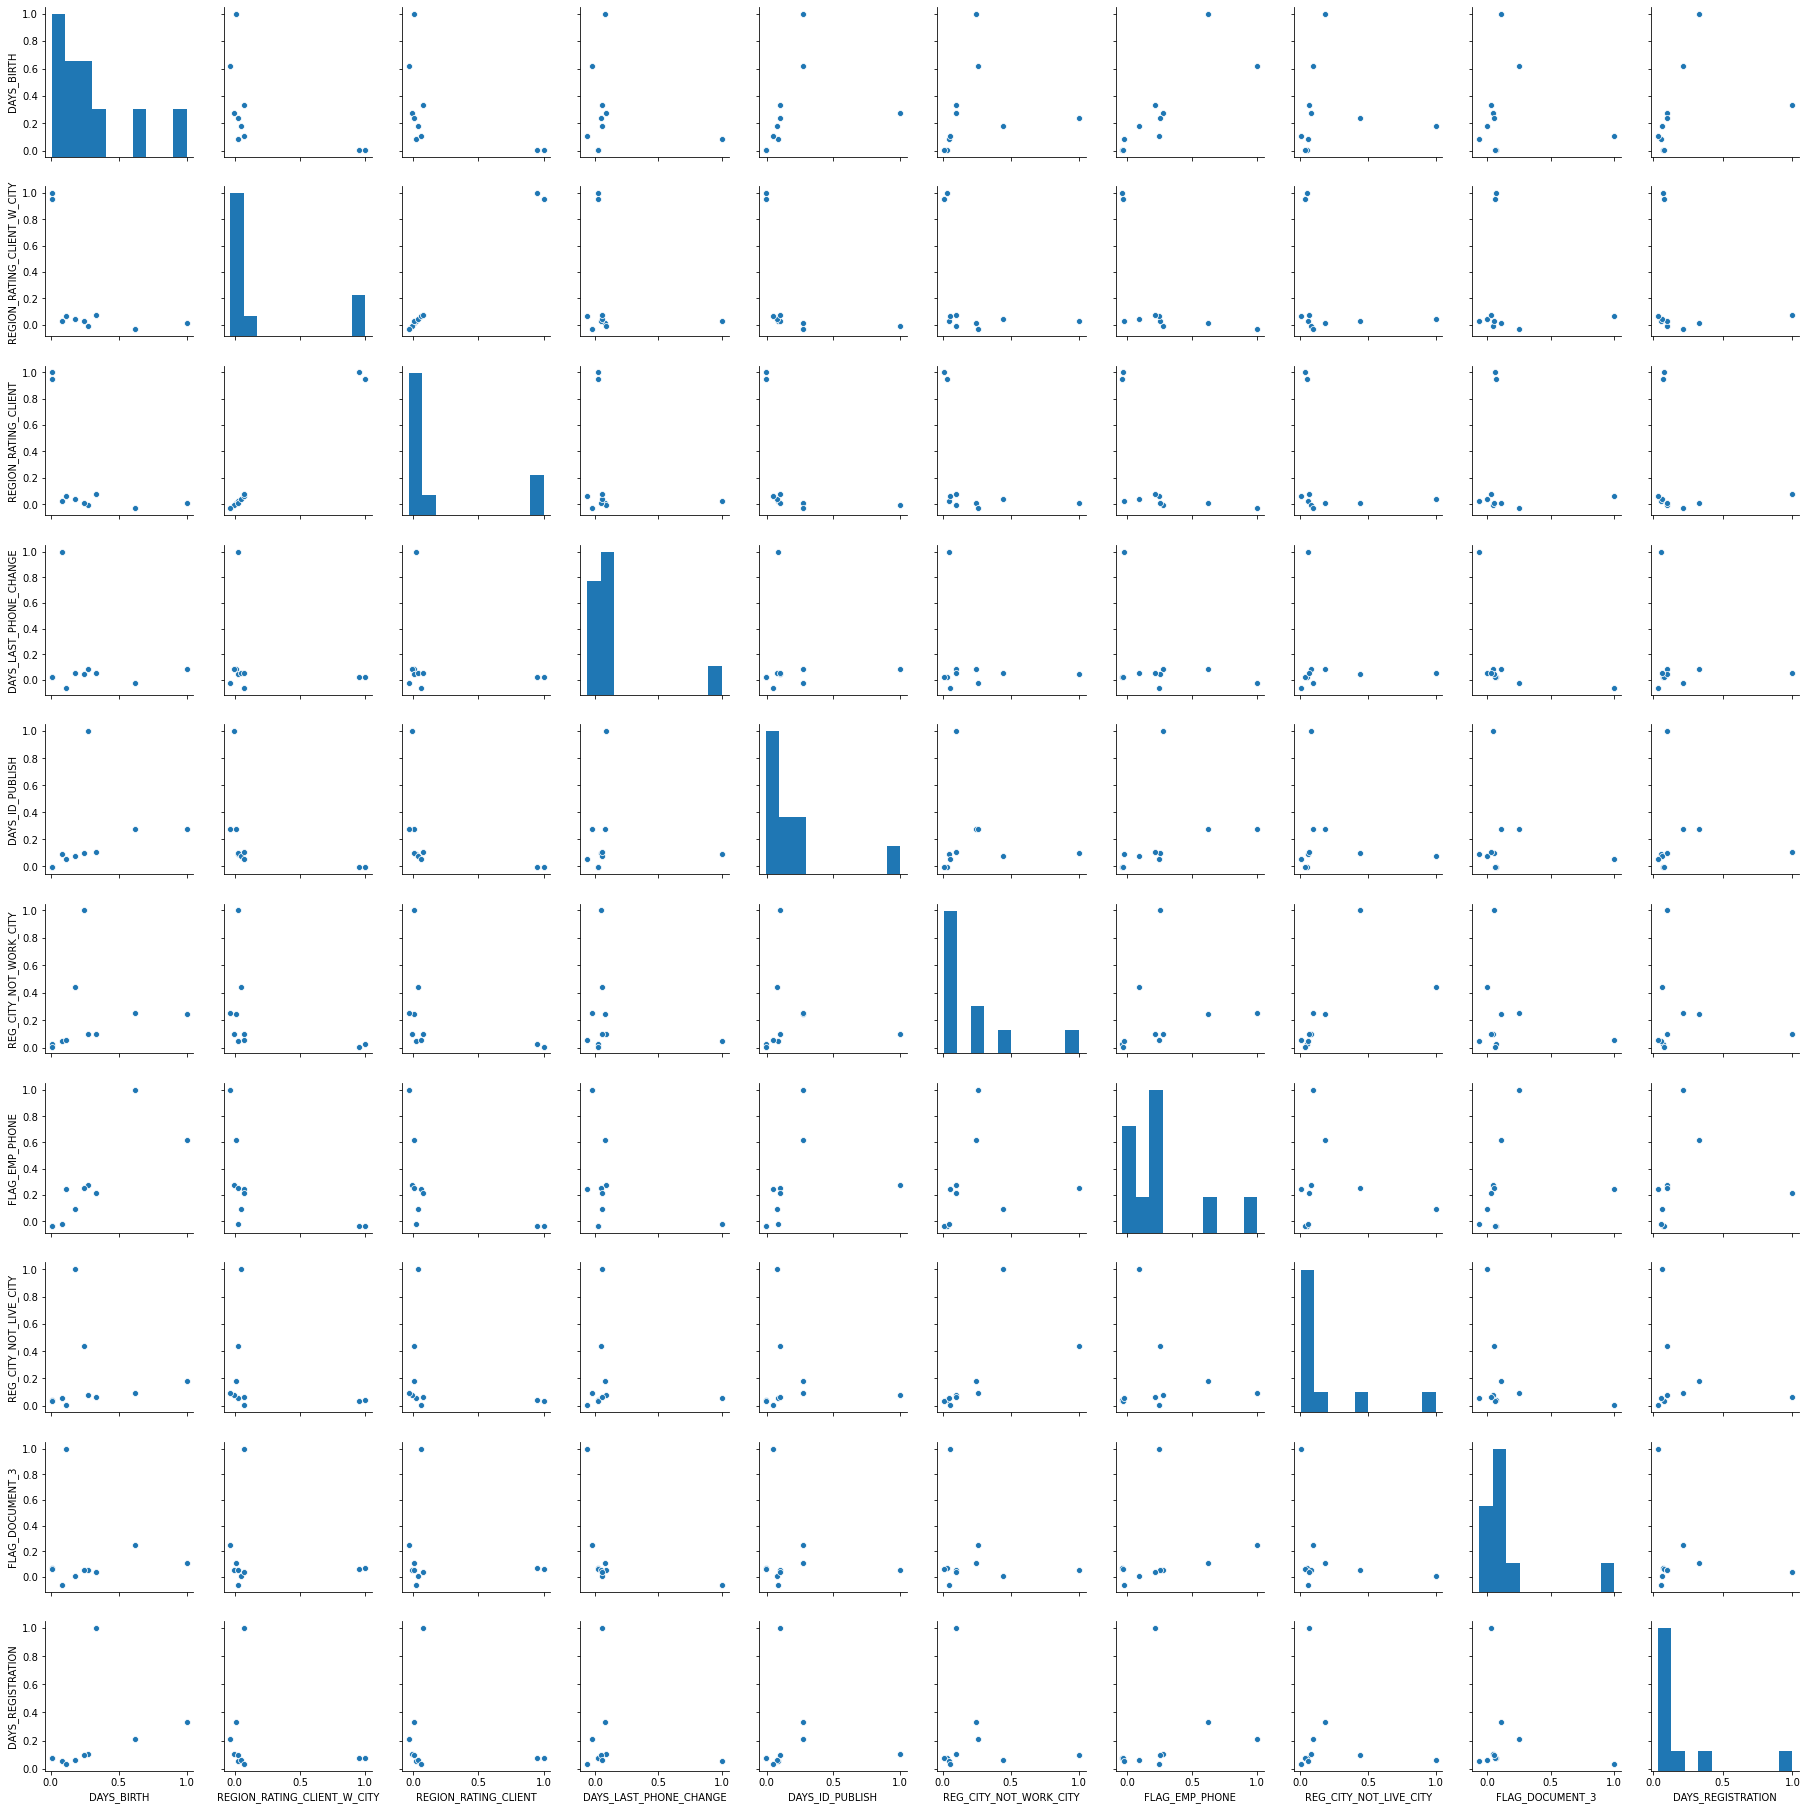

'\n考察\nぱっと見判断できないため、あまり効果が感じられない。\nおそらく分類で利用する指標ではない。\n'

In [290]:
# 図2 散布図行列でみる
sns.pairplot(corr_target)
plt.show()

'''
考察
ぱっと見判断できないため、あまり効果が感じられない。
おそらく分類で利用する指標ではない。
'''

#### 仮説が上手く行かないので、Targetと影響がありそうなモノを列挙する
年齢 DAYS_BIRTH<br> 
クライアントの性別 CODE_GENDER <br>
クライアントの収入 AMT_INCOME_TOTAL<br>
ローンクレジット額 AMT_CREDIT<br>
クライアントが達成した最高の教育のレベル NAME_EDUCATION_TYPE<br>
クライアントの住居状況はどうですか（賃貸、両親との生活、...）NAME_HOUSING_TYPE<br>
クライアントはどのような職業に就いていますか OCCUPATION_TYPE<br>
クライアントが住んでいる地域の私たちの評価（1,2,3）REGION_RATING_CLIENT<br>



データを調べる前に下記8は破産する項目に相関があると予想し、相関係数を調べてみる

◾️項目<br>
DAYS_BIRTH<br>
CODE_GENDER <br>
AMT_INCOME_TOTAL<br>
AMT_CREDIT<br>
NAME_EDUCATION_TYPE<br>
NAME_HOUSING_TYPE<br>
OCCUPATION_TYPE<br>
REGION_RATING_CLIENT<br>

DAYS_BIRTHとFLAG_EMP_PHONE 相関0.62
→誕生年度とクライアントが職場に電話を提供したか比例しているが、貸倒と関係性は低そう

REGION_RATING_CLIENTとREGION_RATING_CLIENT_W_CITY 相関0.95
→クライアントが評価した都市評価と、その町に住んでいる人たちが評価した都市評価では、こちらも貸倒に影響なさそうに見える
REG_CITY_NOT_WORK_CITYとLIVE_CITY_NOT_WORK_CITY　相関0.83


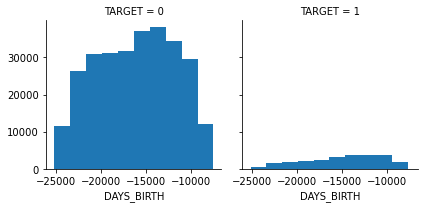

'\n考察\n若者と年齢が高い人に破産率は低いが中間層が多い印象\n'

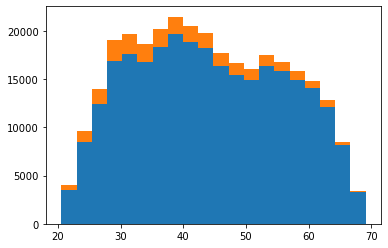

In [243]:
# 図3 積み重なった状態で確認する
grid = sns.FacetGrid(df, col="TARGET")
grid.map(plt.hist, "DAYS_BIRTH")
plt.show()

plt.hist((df[df["TARGET"] == 0]["DAYS_BIRTH"]/365*-1, df[df["TARGET"] == 1]["DAYS_BIRTH"]/365*-1), bins=20,histtype="barstacked")

'''
考察
若者と年齢が高い人に破産率は低いが中間層が多い印象
'''

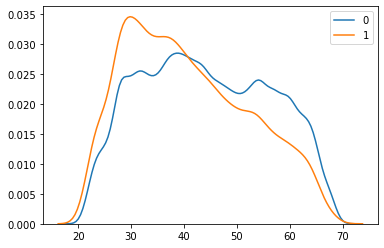

In [249]:
# 図４　%を出してみる
sns.kdeplot(df[df["TARGET"]==0]["DAYS_BIRTH"]/365*-1,label="0")
sns.kdeplot(df[df["TARGET"]==1]["DAYS_BIRTH"]/365*-1,label="1")

'''
考察
破産していない人はバランスが良いが、破産している人は２０〜４０代が多い
'''

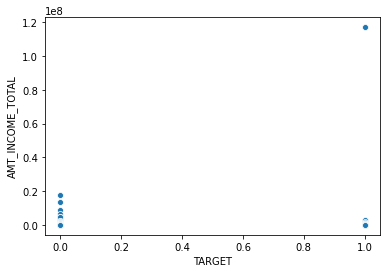

In [34]:
# 図5 破産している人の所得レベル
sns.scatterplot(x=df["TARGET"], y = df["AMT_INCOME_TOTAL"], data=df)
'''
破産している人はほとんど収入がない。
高所得の人は、会社の破産？？
'''

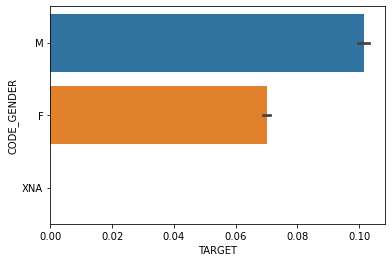

In [235]:
# 図6 男性と女性どちらが多いか確認する
sns.barplot(x = df["TARGET"], y = df["CODE_GENDER"], data=df)

'''
考察
破産者は男性が多い。
'''

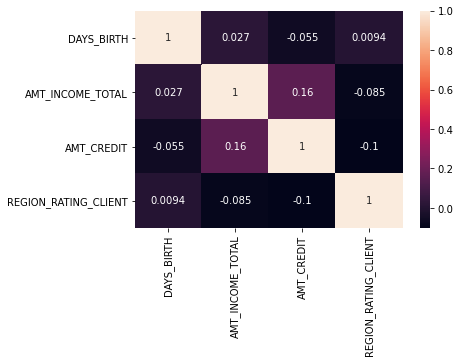

In [262]:
# 図7 仮説の相関関係を調べてみる
df_hypothesis = pd.concat([df["DAYS_BIRTH"],df["CODE_GENDER"],df["AMT_INCOME_TOTAL"],df["NAME_EDUCATION_TYPE"],df["NAME_HOUSING_TYPE"],df["OCCUPATION_TYPE"],df["AMT_CREDIT"],df["REGION_RATING_CLIENT"]], axis=1)
df_corr = df_hypothesis.corr()
sns.heatmap(df_corr, annot=True)

'''
データ同士の相関がほとんどない。
ただし、データ量からして相関が元々低くなることも考えられる。
'''


年齢 DAYS_BIRTH
クライアントの収入 AMT_INCOME_TOTAL
ローンクレジット額 AMT_CREDIT
クライアントが住んでいる地域の私たちの評価（1,2,3）REGION_RATING_CLIENT

'\n考察\n破産している人はほとんどが収入が少ない人たち\n'

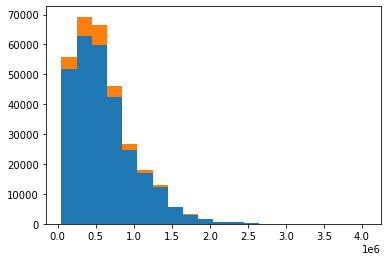

In [272]:
# 図8 収入とTARGETの関係性を見てみる
plt.hist((df[df["TARGET"]==0]["AMT_CREDIT"], df[df["TARGET"]==1]["AMT_CREDIT"]),histtype="barstacked",bins=20)

'''
考察
破産している人はほとんどが収入が少ない人たち
'''


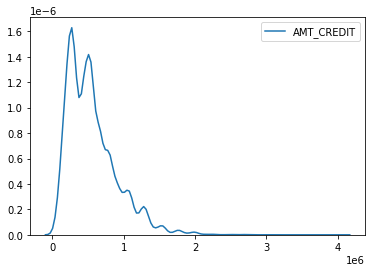

In [289]:
# 図9 破産している人が所得に応じてどれくらいいるか確認する
sns.kdeplot(df[df["TARGET"]==1]["AMT_CREDIT"])

'''
考察
所得2を超え始めるとほとんど破産する人はいない。
ただし、少数だけ破産している人がいる。
'''

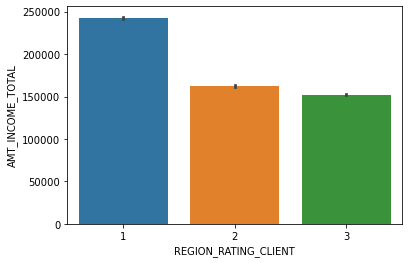

In [306]:
# 図10 クライアントの年収と住んでいる地域の評価を見てみる
sns.barplot(x="REGION_RATING_CLIENT",y="AMT_INCOME_TOTAL", data=df)
plt.show()

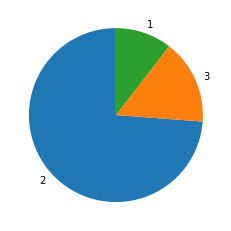

In [305]:
# 図11 クライアントの年収と住んでいる地域の評価の割合を調べる 
plt.pie(df["REGION_RATING_CLIENT"].value_counts(), counterclock=True,startangle=90, labels=df["REGION_RATING_CLIENT"].value_counts().index)
plt.show()

'''
考察
Kaggleの説明では、評価順1,2,3でデータを見る限り1が最も評価が高い。
また、2,3の住宅的評価について評価と年収を比較した所大きな差がないように見える。
'''

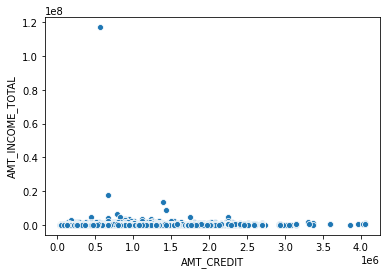

In [326]:
# 図12 クライアントの年収とクレジットの金額を見てみる
sns.scatterplot(df["AMT_CREDIT"], df["AMT_INCOME_TOTAL"], data=df)

'''
考察
ローンの金額によって、収入の格差に影響はない
'''

(array([[6.21720e+04, 1.46348e+05, 4.79930e+04, 2.25610e+04, 3.15100e+03,
         3.53000e+02, 7.50000e+01, 1.40000e+01, 6.00000e+00, 2.00000e+00,
         0.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
         2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00],
        [6.78470e+04, 1.58357e+05, 5.26010e+04, 2.46970e+04, 3.47800e+03,
         4.08000e+02, 8.10000e+01, 2.00000e+01, 6.00000e+00, 3.00000e+00,
         1.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
         2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <a list of 2 Lists of Patches objects>)

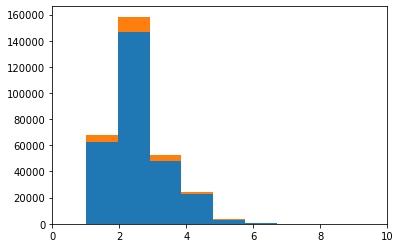

In [338]:
# 図13　家族の数と破産に関係があるのか見てみる
plt.xlim(0,10)
plt.hist((df[df["TARGET"]==0]["CNT_FAM_MEMBERS"], df[df["TARGET"]==1]["CNT_FAM_MEMBERS"]), bins=20, histtype="barstacked")
plt.show()

'''
考察
家族の多さと貸倒の関係はなさそうに見える。
'''

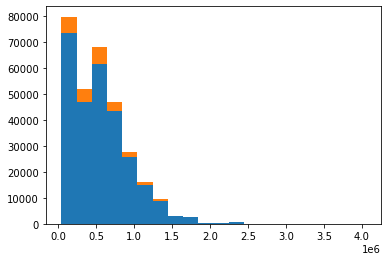

In [352]:
# 図14 車の保有と破産に関係があるのか確認する
plt.hist((df[df["TARGET"]==0]["AMT_GOODS_PRICE"], df[df["TARGET"]==1]["AMT_GOODS_PRICE"]), bins=20, histtype="barstacked")
plt.show()

'''
考察
ローンの金額だが、破産する人ほどお金を借りている、というわけではない。
社長等が借り入れして破産、という事は少なそう。
'''

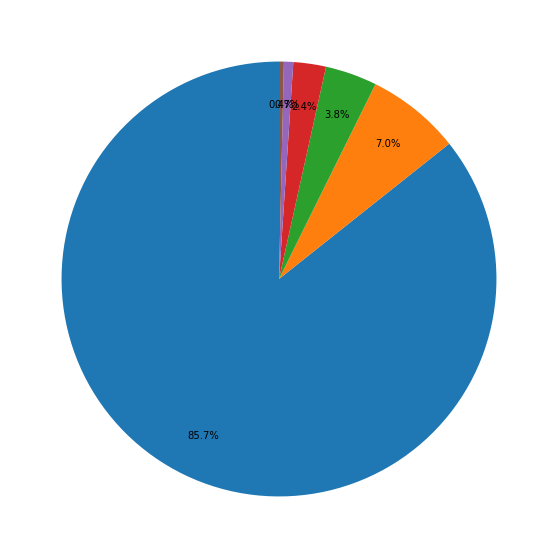

In [374]:
#15 破産した人の住居の％を円グラフにしてみる
plt.figure(figsize=(10,10))
plt.pie(df[df["TARGET"] == 1]["NAME_HOUSING_TYPE"].value_counts(), 
        autopct="%1.1f%%", 
        startangle=90, 
        counterclock=True, 
        pctdistance=0.8)
plt.show()

In [375]:
#めも
cor = df.corr()['TARGET'].abs().nlargest(10)
cor

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

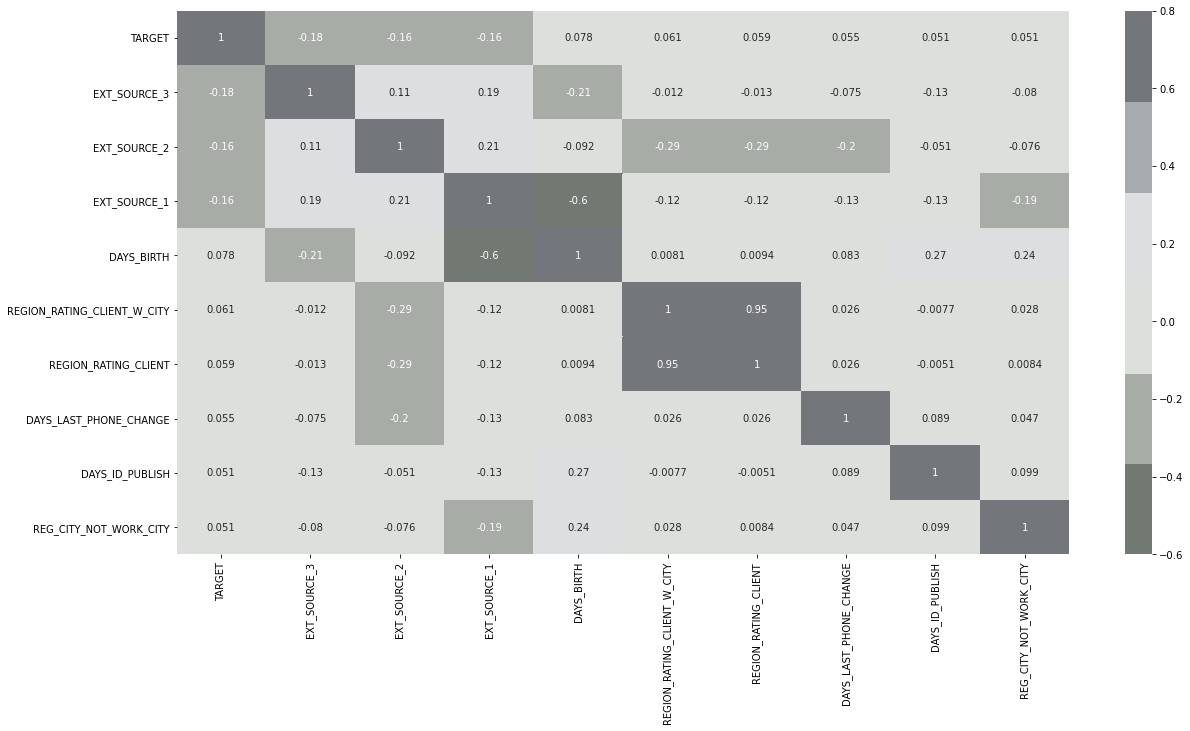

In [47]:
#めも
top_features = cor.index
plt.figure(figsize=(20,10))
pal = sns.diverging_palette(128, 240, 8)
sns.heatmap(df[cor.index].corr(), vmax=0.8, annot=True, cmap=pal)
plt.show()

# 0,1で相関係数は理論上問題である。0,1 
# →0,1の分類問題で、相関係数は理論上おかしい
# 正しいEDAの仕方が回答がないと判断できない

In [309]:
#　やるべき事リスト
'''
1.相関係数を調べているが、targetで１の物を絞って見る
2.相関係数で出力したパラーメータの説明を見る
3.SelectKBestを使う→無理
'''

'\n1.相関係数を調べているが、targetで１の物を絞って見る\n2.相関係数で出力したパラーメータの説明を見る\n3.SelectKBestを使う→無理\n'

In [315]:
len(df_target[i].unique())

2